# Asteroids plot
#### Yuri Shimane
#### 2019.10.21

In [1]:
import numpy as np
import pandas as pd
import spiceypy as spice
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
# load spice kernels
spice.furnsh('../spice/naif0012.tls')

In [3]:
# import ephemerides data into pandas dataframe
elmnts = ['Name','Epoch','a','e','i','LAN','periap','theta']
df = pd.read_fwf('../gtoc4_problem_data.txt', sep='\t', skiprows=1)
num,tmp = df.shape
print(df.shape)
df.head(5)

(1436, 8)


,# Name,Epoch (MJD),a (AU),e,i (deg),LAN (deg),arg. periap. (deg),mean anomaly (deg)
0,'1580',54800.0,2.196803,0.487683,52.090794,62.324795,159.539839,3.521687
1,'1620',54800.0,1.245551,0.335511,13.337693,337.266017,276.806539,136.950031
2,'1943',54800.0,1.430317,0.255816,8.704065,246.401915,338.253875,288.405238
3,'2061',54800.0,2.264953,0.537119,3.770822,207.654108,156.432028,46.995497
4,'2135',54800.0,1.599572,0.503268,23.054312,191.262849,290.838892,256.724981


In [28]:
# reassign column names
df.columns =  ['Name','Epoch','a','e','i','LAN','omega','M']
df.head(3)

,Name,Epoch,a,e,i,LAN,omega,M
0,'1580',54800.0,2.196803,0.487683,52.090794,62.324795,159.539839,3.521687
1,'1620',54800.0,1.245551,0.335511,13.337693,337.266017,276.806539,136.950031
2,'1943',54800.0,1.430317,0.255816,8.704065,246.401915,338.253875,288.405238


In [29]:
# define gravitational parameters
MU = 1.32712440018*10**11   # sun's gravitational parameter [km^3/s^2]
AU = 1.49597870691*10**8    # astronomical unit [AU] to [km]
g0 = 9.80665                # gravitational acceleration [m/s^2]

# define time to compute state vector
timestr = '2008-11-30'
et = spice.utc2et(timestr) # FIXME (MJD = 54800 in ephemeris seconds)

# compute state vector
sv = np.zeros((3,num))
print(sv.shape)

for i in range(num): 
    rp = df.at[i,'a'] * (1 - df.at[i,'e'])
    elts = [rp, df.at[i,'e'], np.rad2deg(df.at[i,'i']), np.rad2deg(df.at[i,'LAN']), np.rad2deg(df.at[i,'omega']), np.rad2deg(df.at[i,'M']), et, MU]
    tmp = spice.conics(elts,et)
    # store position
    sv[0,i] = tmp[0]  # x-coordinate
    sv[1,i] = tmp[1]  # y-coordinate
    sv[2,i] = tmp[2]  # z-coordinate
    
sv


(3, 1436)


array([[-1.60642198, -0.94749583, -1.00813527, ...,  0.02351832,
         0.48087779, -2.3121226 ],
       [ 0.74600511, -0.46638608,  0.08526597, ..., -0.81799958,
         0.0161687 ,  1.4185359 ],
       [ 0.07059124,  0.48358758,  0.45309219, ..., -1.31191376,
         0.79105571,  0.92155402]])

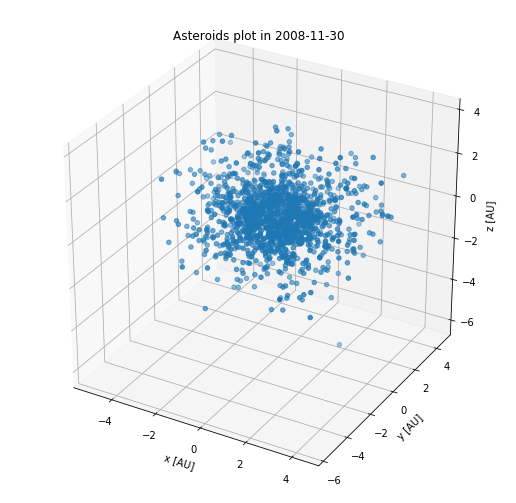

In [24]:
# plot
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(sv[0,:], sv[1,:], sv[2,:])

plt.title(f'Asteroids plot in {timestr}')
ax.set_xlabel('x [AU]')
ax.set_ylabel('y [AU]')
ax.set_zlabel('z [AU]')
plt.show()
